In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
#Generated Pions
m = np.random.normal(139.07138, 0.00035, 10000)
m

array([139.07151211, 139.07132034, 139.07183026, ..., 139.0715279 ,
       139.0717468 , 139.07141339])

In [65]:
#Generated Momentum 
a = np.random.exponential(10.0, 10000)
a

array([ 2.16487087,  4.90798112,  1.62827986, ..., 10.52530924,
       15.45018883, 11.79885855])

In [66]:
#Decay Angle
b = np.random.uniform(-1, 1, 10000)
np.rad2deg(b)
deg=np.rad2deg(b)

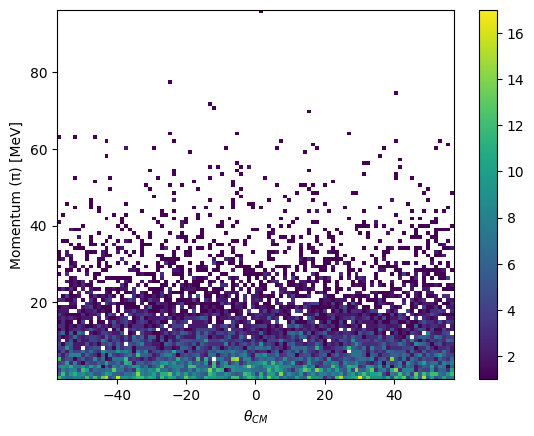

In [67]:
### P vs. angle
plt.hist2d(deg, a, bins=100, cmin=1)
#plt.xlabel('\u03B8_CM')
plt.xlabel('$\u03B8_{CM}$')
plt.ylabel('Momentum (\u03C0) [MeV]')
plt.colorbar()
#plt.legend()
plt.savefig('./PvsThetaforPions.png')

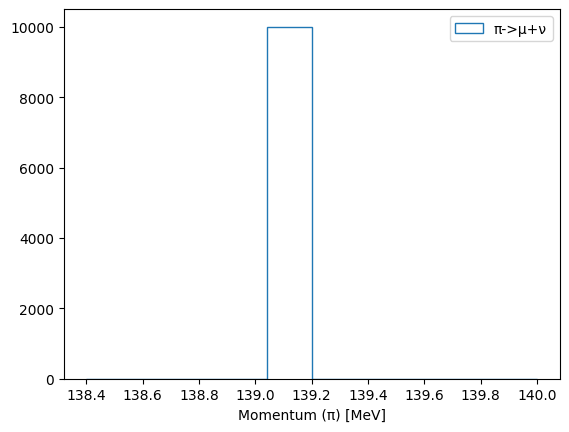

In [68]:
### 1D m
plt.hist(m, range=(138.4, 140), histtype='step', label='\u03C0->\u03BC+\u03BD')
#plt.xlim(0, 0.5)
plt.xlabel('Momentum (\u03C0) [MeV]') 
plt.legend()

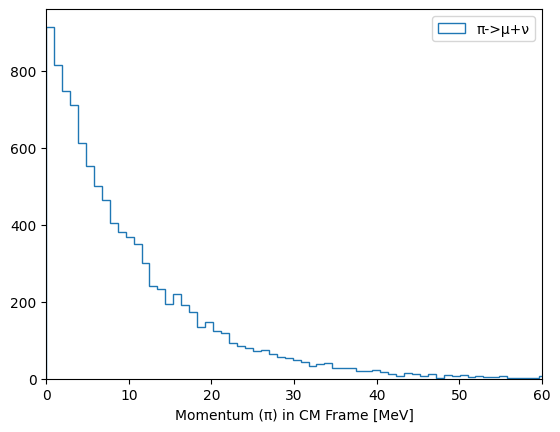

In [69]:
### 1D p
plt.hist(a, bins=100, histtype='step', label='\u03C0->\u03BC+\u03BD')
plt.xlabel('Momentum (\u03C0) in CM Frame [MeV]')
plt.xlim(0,60)
plt.legend()


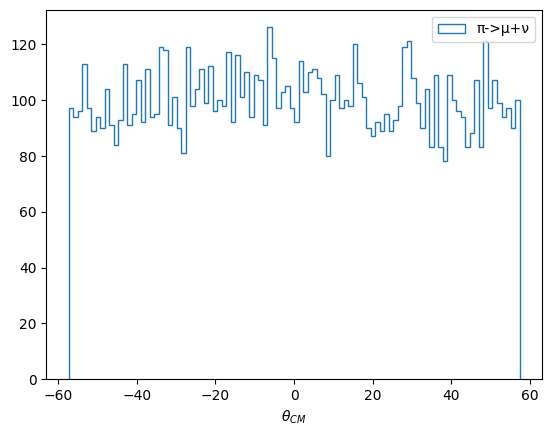

In [70]:
### 1D theta
plt.hist(deg, bins=100, histtype='step', label='\u03C0->\u03BC+\u03BD')
plt.xlabel('$\u03B8_{CM}$')
plt.legend()

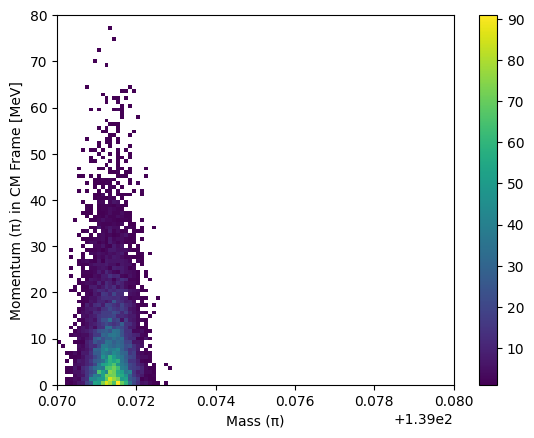

In [71]:
#P vs M
plt.hist2d(m,a, bins=100, cmin=1, range=[[139.07,139.08],[0,80]])
plt.xlabel('Mass (\u03C0)')
plt.ylabel('Momentum (\u03C0) in CM Frame [MeV]')
plt.colorbar()

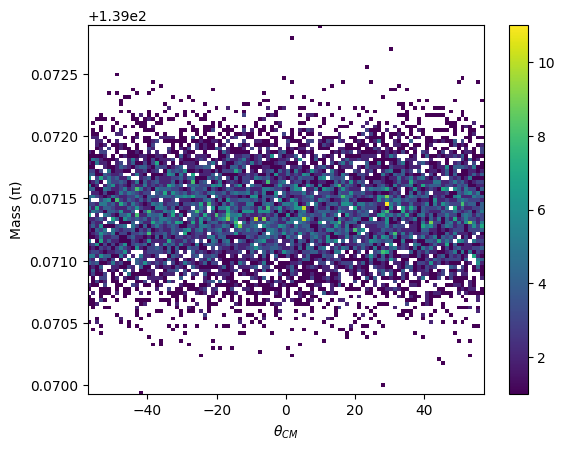

In [72]:
#M vs Decay Angle
plt.hist2d(deg,m, bins=100, cmin=1)
plt.xlabel('$\u03B8_{CM}$')
plt.ylabel('Mass (\u03C0)')
plt.colorbar()

In [73]:
#Generated Muons
mb=np.random.normal(105.6583755,0.0000023,10000)
mb

array([105.65837466, 105.65837617, 105.65837412, ..., 105.65837577,
       105.65837465, 105.65837359])

In [141]:
import numpy as np

def CM_momentum(ma,mb):
    p = [(ma*ma) - (mb*mb)]/(2*(ma))
    return p

def Energy_of_B(mB,pB):
    EB=np.sqrt((mB*mB)+(pB*pB))
    return EB



def lab_mom_perpendi(pB,angle):
    P_perpendi=pB* np.sin(angle)
    return P_perpendi

def energy_lab(EB,pB,angle):
    EB_lab=([gamma*EB]+[np.cos(angle)*pB*beta*gamma])
    return EB_lab

def Plab_mag(p1,p2):
    P_mag=np.sqrt((p1*p1)+(p2*p2))
    return P_mag

def decay_angle_lab(P3,P4):
    Angle_lab=np.arccos(P3/P4)
    return Angle_lab

In [142]:
cm_p = CM_momentum(m,mb)
cm_p

array([[29.39923936, 29.39908698, 29.39949067, ..., 29.39925097,
        29.39942444, 29.39916232]])

In [143]:
eb = Energy_of_B(mb,cm_p)
eb

array([[109.67227275, 109.67223336, 109.6723396 , ..., 109.67227693,
        109.67232236, 109.67225107]])

In [144]:
beta = 0.2
gamma = 1./np.sqrt(1-beta**2)

In [145]:
def lab_mom_parallel(gamma,pB,angle,beta,EB):
    P_parallel=(gamma*pB*np.cos(angle))+(EB*beta*gamma)
    return P_parallel

parallel = lab_mom_parallel(gamma,cm_p, b,beta, eb)

In [146]:
parallel

array([[41.71409816, 50.25342277, 44.72219934, ..., 52.39224462,
        48.13693551, 52.2914171 ]])

In [147]:
perpendi = lab_mom_perpendi(cm_p, b)
perpendi

array([[ 2.24880207e+01, -1.09003197e+01, -1.96319539e+01, ...,
         1.52935190e-03, -1.50923135e+01,  2.40695955e+00]])

In [148]:
eblab=energy_lab(eb, cm_p, b)
eblab

[array([[111.93379466, 111.93375446, 111.93386288, ..., 111.93379892,
         111.93384528, 111.93377252]]),
 array([[3.86546785, 5.57333437, 4.46708535, ..., 6.00109697, 5.15003329,
         5.98093252]])]

In [149]:
mag = Plab_mag(parallel, perpendi)
mag

array([[47.3896303 , 51.42201347, 48.84146525, ..., 52.39224464,
        50.44742301, 52.34678363]])

In [150]:
lab_angle = decay_angle_lab(parallel, mag)
lab_angle

array([[4.94435270e-01, 2.13598198e-01, 4.13648299e-01, ...,
        2.91904240e-05, 3.03821824e-01, 4.59972580e-02]])

In [151]:
np.rad2deg(lab_angle) 
an=np.rad2deg(lab_angle)
an

array([[2.83290542e+01, 1.22382753e+01, 2.37003018e+01, ...,
        1.67248809e-03, 1.74077082e+01, 2.63544875e+00]])

In [152]:
perpendi.flatten()

array([ 2.24880207e+01, -1.09003197e+01, -1.96319539e+01, ...,
        1.52935190e-03, -1.50923135e+01,  2.40695955e+00])

Text(0.5, 0, 'P $(perpendicular)_{Lab}$ [MeV]')

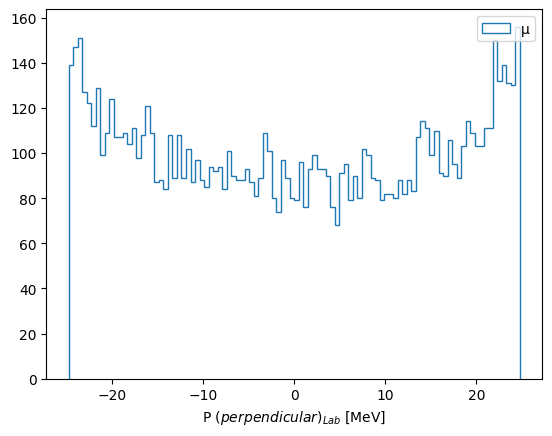

In [153]:
plt.hist(perpendi.flatten(), histtype='step', bins=100, label='\u03BC')
plt.legend()
plt.xlabel('P $(perpendicular)_{Lab}$ [MeV]')

In [154]:
parallel.flatten()

array([41.71409816, 50.25342277, 44.72219934, ..., 52.39224462,
       48.13693551, 52.2914171 ])

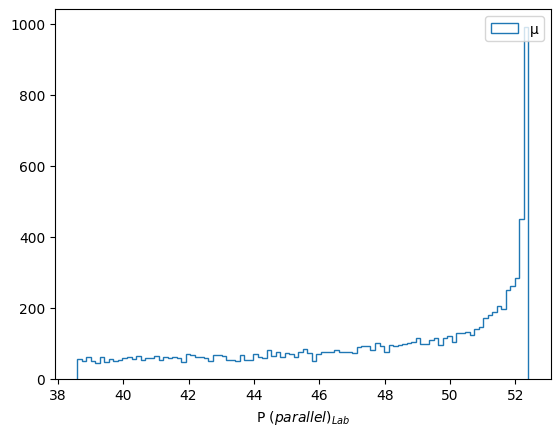

In [155]:
plt.hist(parallel.flatten(), histtype='step', bins=100, label='\u03BC' )
plt.xlabel('P $ (parallel)_{Lab} $')
plt.legend()

In [156]:
eblab.flatten()

AttributeError: 'list' object has no attribute 'flatten'

In [140]:
plt.hist(eblab.flatten(), histtype='step', bins=100,label='\u03BC' )
plt.xlabel('$Energy_{Lab}$ [MeV]')
plt.legend()

AttributeError: 'list' object has no attribute 'flatten'

In [91]:
an.flatten()

array([2.83290542e+01, 1.22382753e+01, 2.37003018e+01, ...,
       1.67248809e-03, 1.74077082e+01, 2.63544875e+00])

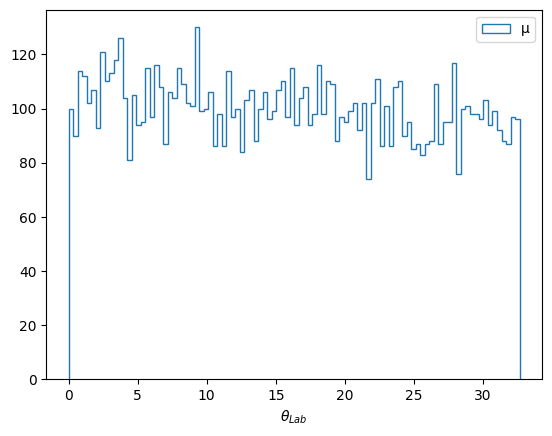

In [92]:
plt.hist(an.flatten(), bins=100, histtype='step', label='\u03BC')
plt.xlabel('$\u03B8_{Lab}$')
plt.legend()

Text(0, 0.5, 'P $ (parallel)_{Lab}[MeV] $')

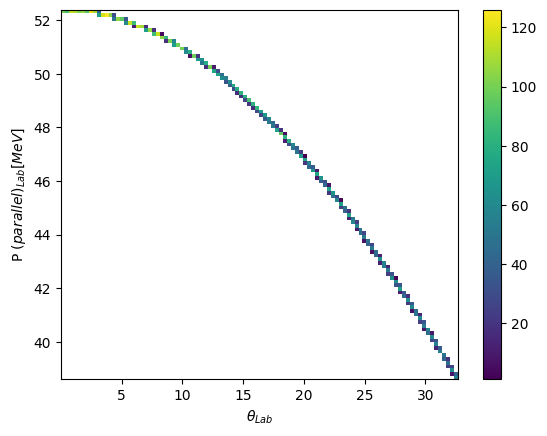

In [93]:
plt.hist2d(an.flatten(), parallel.flatten(), bins=100, cmin=1, label='\u03BC')
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel('P $ (parallel)_{Lab}[MeV] $')


Text(0, 0.5, 'P $(perpendicular)_{Lab}$ [MeV]')

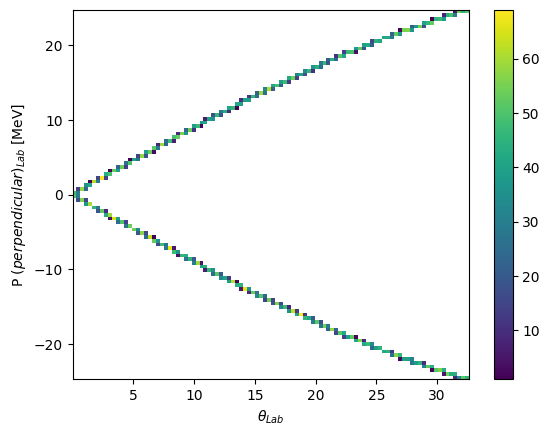

In [94]:
plt.hist2d(an.flatten(),perpendi.flatten(),bins=100,cmin=1 )
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel('P $(perpendicular)_{Lab}$ [MeV]')





In [95]:
plt.hist2d(an.flatten(),eblab.flatten(), bins=100, cmin=1)
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel(' $Energy_{Lab}$ [MeV]')

AttributeError: 'list' object has no attribute 'flatten'

In [96]:
def neu_mom_lab(gamma,en,beta,theta_CM):
    P_c_par= (gamma*en*np.cos(theta_CM))+(beta*gamma*en)
    return P_c_par


def neu_mom_perpendi(en, theta_CM):
    P_c_perpendi=(en*np.sin(theta_CM))
    return P_c_perpendi



In [97]:
 pc_par = neu_mom_lab(gamma, cm_p, beta, deg)
 pc_par   
    


array([[ 34.02193666, -23.22777532,  -8.821911  , ...,  36.00644857,
         31.91407414,   5.5141296 ]])

In [98]:
pc_perpendi=neu_mom_perpendi(cm_p, deg)
pc_perpendi


array([[-10.51448473,  -6.64487   ,  25.56161099, ...,   0.08762528,
         14.82244343, -29.39529062]])

In [99]:
def energy_c(gamma,pc,beta,theta_CM):
    ec= (gamma*pc)+ (beta*gamma*pc*np.cos(theta_CM))
    return ec

In [100]:
energy_c(gamma, cm_p, beta, deg)
Ec=energy_c(gamma, cm_p, beta, deg)
Ec

array([[35.60964144, 24.15954974, 27.04111813, ..., 36.00655519,
        35.18825028, 29.90800454]])

In [101]:
def Pclab_mag(p1,p2):
    Pc_mag=np.sqrt((p1*p1)+(p2*p2))
    return Pc_mag

In [102]:
Pclab_mag(pc_par, pc_perpendi)
Pcmagni=Pclab_mag(pc_par, pc_perpendi)
Pcmagni

array([[35.60964144, 24.15954974, 27.04111813, ..., 36.00655519,
        35.18825028, 29.90800454]])

In [103]:
def decay_angle_lab(P3,P4):
    Angle_lab=np.arccos(P3/P4)
    return Angle_lab

In [104]:
decay_angle_lab(pc_par, Pcmagni)
lab_angle_C=decay_angle_lab(pc_par, Pcmagni)
lab_angle_C

array([[2.99738868e-01, 2.86296017e+00, 1.90312018e+00, ...,
        2.43359481e-03, 4.34804114e-01, 1.38536580e+00]])

In [105]:
np.rad2deg(lab_angle_C) 
ang=np.rad2deg(lab_angle_C)
ang

array([[1.71737721e+01, 1.64035534e+02, 1.09040754e+02, ...,
        1.39434712e-01, 2.49124406e+01, 7.93756137e+01]])

In [106]:
ang.flatten()

array([1.71737721e+01, 1.64035534e+02, 1.09040754e+02, ...,
       1.39434712e-01, 2.49124406e+01, 7.93756137e+01])

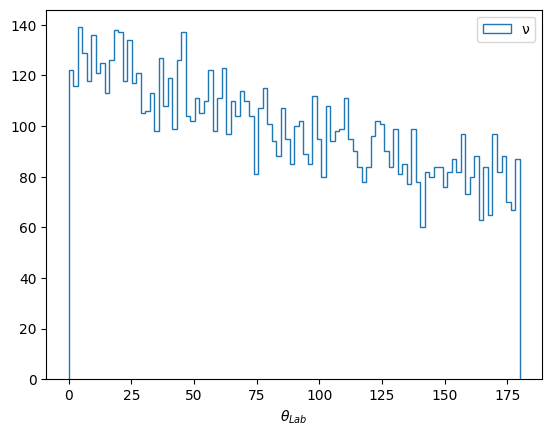

In [107]:
plt.hist(ang.flatten(), bins=100, histtype='step', label='\u03BD')
plt.xlabel('$\u03B8_{Lab}$')
plt.legend()

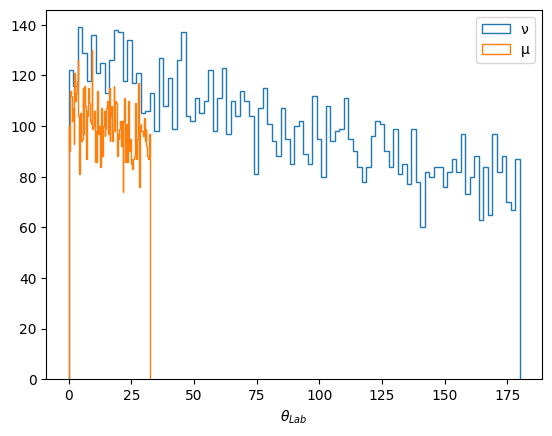

In [108]:
plt.hist(ang.flatten(), bins=100, histtype='step', label='\u03BD')
plt.hist(an.flatten(), bins=100, histtype='step', label='\u03BC')
plt.xlabel('$\u03B8_{Lab}$')
plt.legend()


In [109]:
pc_par.flatten()

array([ 34.02193666, -23.22777532,  -8.821911  , ...,  36.00644857,
        31.91407414,   5.5141296 ])

Text(0.5, 0, 'P $(parallel)_{Lab}$ [MeV]')

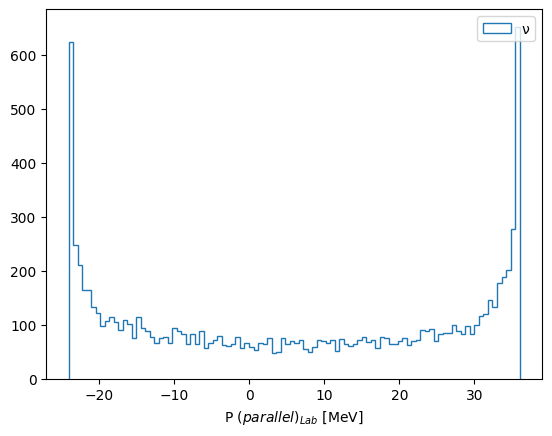

In [110]:
plt.hist(pc_par.flatten(), bins=100, histtype='step', label='\u03BD')
plt.legend()
plt.xlabel('P $(parallel)_{Lab}$ [MeV]')

In [111]:
pc_perpendi.flatten()

array([-10.51448473,  -6.64487   ,  25.56161099, ...,   0.08762528,
        14.82244343, -29.39529062])

Text(0.5, 0, 'P $(perpendicular)_{Lab}$ [MeV]')

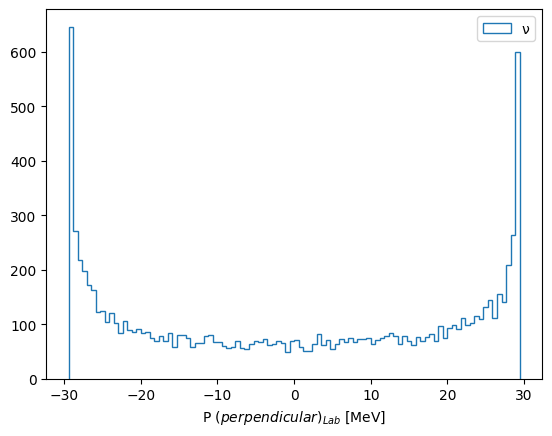

In [112]:
plt.hist(pc_perpendi.flatten(), bins=100,  histtype='step', label='\u03BD')
plt.legend()
plt.xlabel('P $(perpendicular)_{Lab}$ [MeV]') 

In [113]:
Ec.flatten()

array([35.60964144, 24.15954974, 27.04111813, ..., 36.00655519,
       35.18825028, 29.90800454])

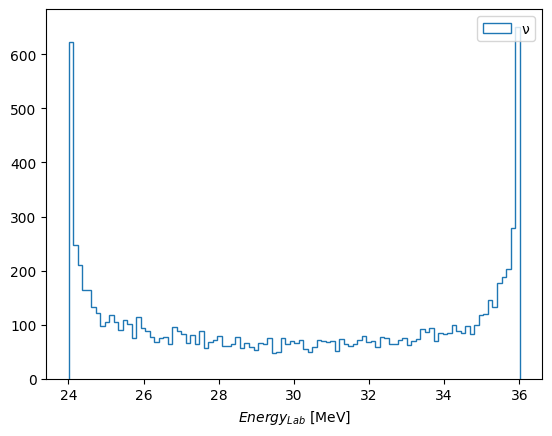

In [114]:
plt.hist(Ec.flatten(), histtype='step', bins=100,label='\u03BD' )
plt.xlabel('$Energy_{Lab}$ [MeV]')
plt.legend()

Text(0, 0.5, 'P $ (parallel)_{Lab}[MeV] $')

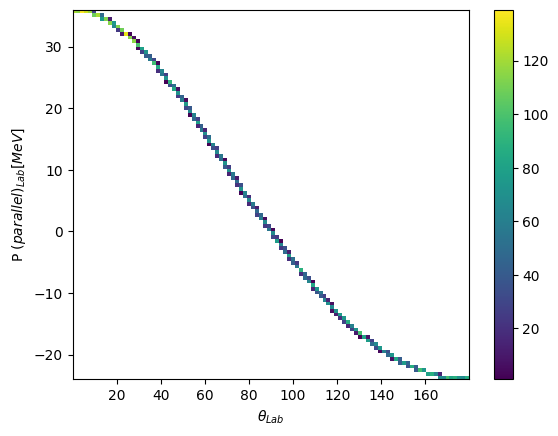

In [115]:
plt.hist2d(ang.flatten(),pc_par.flatten(), bins=100, cmin=1)
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel('P $ (parallel)_{Lab}[MeV] $')

Text(0, 0.5, 'P $(perpendicular)_{Lab}$ [MeV]')

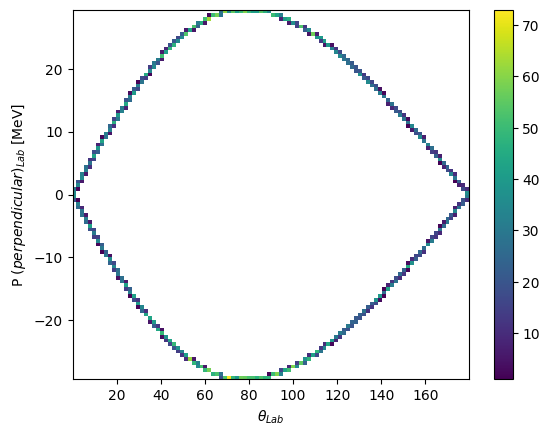

In [116]:
plt.hist2d(ang.flatten(),pc_perpendi.flatten(), bins=100, cmin=1)
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel('P $(perpendicular)_{Lab}$ [MeV]')


Text(0, 0.5, ' $Energy_{Lab}$ [MeV]')

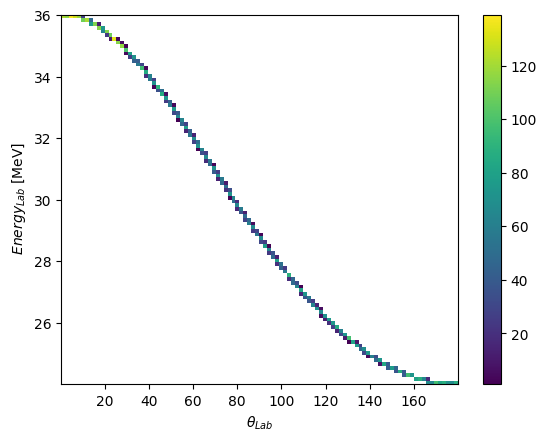

In [120]:
plt.hist2d(ang.flatten(), Ec.flatten(), bins=100, cmin=1)
plt.colorbar()
plt.xlabel('$\u03B8_{Lab}$')
plt.ylabel(' $Energy_{Lab}$ [MeV]')